# Equating nei Test Psicologici {#sec-equating}

**Prerequisiti**

**Concetti e Competenze Chiave**

- Comprendere il processo di equating e la sua importanza per rendere confrontabili i punteggi di forme diverse di un test.  
- Conoscere i principali disegni sperimentali (gruppi equivalenti, gruppi non equivalenti e gruppo unico) e i loro requisiti.  
- Distinguere tra metodi lineari (media, lineare) e non lineari (equipercentile) e le loro applicazioni pratiche.  
- Essere consapevoli della possibilità di usare item comuni o persone comuni per collegare le scale di punteggio attraverso modelli della teoria della risposta all’item.  

**Preparazione del Notebook**

In [3]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(equate)

## Introduzione

L'equating è una procedura statistica utilizzata quando somministrazioni su più occasioni e a diversi gruppi di esaminandi possono portare a una sovraesposizione degli item, compromettendo la sicurezza del test. Per limitare l'esposizione degli item, si possono utilizzare forme alternative del test. Tuttavia, l'uso di forme multiple genera scale di punteggio diverse, che misurano il costrutto di interesse a livelli di difficoltà differenti. L'obiettivo dell'equating è quindi correggere queste differenze di difficoltà tra le forme del test, rendendo le scale di punteggio comparabili.

L'equating è il processo che stabilisce una relazione statistica tra le distribuzioni dei punteggi di diverse forme di un test e, di conseguenza, tra le scale di punteggio associate. Questo permette di rendere confrontabili i punteggi, anche se derivano da forme diverse dello stesso test. Quando le forme del test sono costruite seguendo le stesse specifiche (ad esempio, misurano lo stesso costrutto con uguale affidabilità) e hanno caratteristiche statistiche simili (difficoltà comparabile, distribuzione dei punteggi analoga), questa relazione è definita come **funzione di equating**. La funzione di equating consente di tradurre i punteggi da una scala all'altra, trattandole come **scale parallele** secondo la teoria classica dei test. 

Se, invece, le forme del test differiscono in aspetti significativi, come la lunghezza o il contenuto, la relazione tra le scale viene definita **linking**, e non equating. In questo caso, le scale risultano correlate ma **non parallele** né interscambiabili, poiché non garantiscono piena equivalenza nei punteggi. La relazione tra queste scale è descritta da una **funzione di linking**.

Per ottenere una funzione di equating valida, devono essere soddisfatti alcuni requisiti fondamentali:

1. Le forme del test devono misurare lo stesso costrutto con la stessa affidabilità.
2. I risultati dell'equating devono garantire equità, ovvero ogni esaminando dovrebbe ottenere lo stesso risultato indipendentemente dal fatto che gli venga somministrata la forma $X$ o la forma $Y$ (Lord, 1980).
3. La funzione di equating deve essere simmetrica: se un punteggio è tradotto da una scala all'altra, il processo inverso deve restituire il punteggio originale.
4. La funzione deve essere invariabile rispetto alla popolazione degli esaminandi: deve funzionare nello stesso modo per diversi gruppi di persone.

In sintesi, si può dire che **l'equating si applica a scale parallele** nel senso della teoria classica dei test (stessa media della distribuzione, identica varianza, medesima affidabilità, misurazione dello stesso costrutto, struttura e difficoltà degli item pressoché identiche), mentre il **linking si utilizza per scale non parallele**, che possono essere comparabili solo in modo parziale (lunghezza differente, contenuti parzialmente diversi, variabilità non perfettamente sovrapponibile, difficoltà degli item non completamente omogenee).

## Progettazione dell'Equating

Le procedure di equating e linking dei punteggi osservati richiedono dati raccolti in diverse somministrazioni del test. Il disegno di equating specifica come le forme del test e i gruppi di esaminandi differiscono tra le somministrazioni. Per semplicità, i disegni di equating possono essere classificati in tre tipi principali: **gruppo unico**, **gruppi equivalenti** e **gruppi non equivalenti**. Le forme del test vengono costruite in base al tipo di gruppo considerato.

### Disegno a gruppo unico

In questo disegno, un unico gruppo, campionato dalla popolazione target $T$, sostiene due forme del test $X$ e $Y$. È possibile bilanciare l'ordine di somministrazione (metà del gruppo sostiene $X$ prima di $Y$ e l'altra metà viceversa). Eventuali differenze nelle distribuzioni dei punteggi tra $X$ e $Y$ vengono attribuite esclusivamente alle forme del test, poiché si assume che l'abilità del gruppo resti costante.

### Disegno a gruppi equivalenti

Questo disegno prevede che due campioni casuali della popolazione target $T$ sostengano rispettivamente $X$ e $Y$. Anche in questo caso, si assume che l'abilità dei due gruppi sia costante, e le differenze nei punteggi riflettono le differenze di difficoltà tra le forme del test.

### Disegno a gruppi non equivalenti

Quando i gruppi non sono equivalenti, sorgono due problemi: 

1. La popolazione target deve essere definita indirettamente, utilizzando campioni da due popolazioni di esaminandi, $P$ e $Q$.
2. Le differenze di abilità tra i gruppi devono essere considerate, poiché possono confondere la stima delle differenze di difficoltà tra le forme del test.

Per affrontare questi problemi, si utilizza un **anchor test**, $V$, un test comune somministrato a entrambi i gruppi per controllare o eliminare le differenze di abilità. In alternativa, si possono usare covariate esterne, come i punteggi ottenuti in altri test.

## Funzioni di Equating

Le procedure di equating utilizzano funzioni matematiche per mappare i punteggi di una forma del test su una scala comune. Queste funzioni possono essere classificate come **lineari** (ad esempio, identità, media e regressione lineare) o **non lineari** (ad esempio, equipercentile). Ogni tipo di funzione si basa su assunzioni specifiche riguardo le differenze di difficoltà tra le forme del test.

### Funzione di identità

La funzione di identità si applica quando le forme del test hanno la stessa scala. In questo caso, i punteggi non vengono modificati, e la relazione tra $X$ e $Y$ è semplicemente:

$$
id_Y(x) = x.
$$

### Funzione della media

Nell'equating basato sulla media, si assume che la forma $X$ differisca dalla forma $Y$ per un valore costante lungo l'intera scala dei punteggi. Ad esempio, se la forma $X$ è più facile di 2 punti rispetto alla forma $Y$ per gli esaminandi con punteggi alti, si assume che sia ugualmente più facile di 2 punti anche per quelli con punteggi bassi. Sebbene questa ipotesi di differenza costante possa risultare troppo restrittiva in molte situazioni di testing, l'equating basato sulla media è utile per illustrare alcuni concetti fondamentali dell'equating.

La funzione basata sulla media calcola le differenze di difficoltà tra le due forme utilizzando la differenza tra le medie dei punteggi, $\mu_Y - \mu_X$. La funzione è espressa come:

$$
mean_Y(x) = x + (\mu_Y - \mu_X).
$$

### Funzione Lineare

A differenza della funzione basata sulla media, che assume una differenza costante tra due forme del test, l’equating lineare consente che le differenze di difficoltà tra le forme $X$ e $Y$ varino lungo la scala dei punteggi. Ad esempio, l’equating lineare permette che la forma $X$ sia più difficile della forma $Y$ per esaminandi con punteggi bassi, ma meno difficile per esaminandi con punteggi alti.

Nell’equating lineare, i punteggi che si trovano a una distanza standardizzata equivalente (in unità di deviazione standard) dalle rispettive medie vengono resi uguali. In questo modo, l’equating lineare tiene conto sia delle differenze nei valori medi, sia delle differenze nelle unità di scala (deviazioni standard) delle due forme. Definendo $\sigma_X$ e $\sigma_Y$ come le deviazioni standard dei punteggi nelle forme $X$ e $Y$, l’equazione di conversione lineare si basa sull’uguaglianza degli z-score tra le due forme, espressa come:

$$
\frac{x - \mu_X}{\sigma_X} = \frac{y - \mu_Y}{\sigma_Y}.
$$

Risolvendo questa equazione per $y$, si ottiene la funzione di equating lineare:

$$
lin_Y(x) = \frac{\sigma_Y}{\sigma_X}x + \left(\mu_Y - \frac{\sigma_Y}{\sigma_X}\mu_X\right),
$$

dove il coefficiente angolare ($\text{slope}$) è dato da $\frac{\sigma_Y}{\sigma_X}$ e l’intercetta ($\text{intercept}$) è $\mu_Y - \frac{\sigma_Y}{\sigma_X}\mu_X$.

Se le deviazioni standard delle due forme ($\sigma_X$ e $\sigma_Y$) fossero uguali, la funzione lineare si ridurrebbe alla funzione basata sulla media. Questo dimostra che la funzione lineare generalizza quella basata sulla media, includendo la possibilità di differenze nella dispersione dei punteggi tra le forme.

### Equipercentile Equating

L’equating equipercentile è una tecnica avanzata utilizzata nei casi in cui le differenze tra le forme di un test non possono essere descritte da una relazione lineare. A differenza dell’equating lineare, che assume una variazione proporzionale lungo tutta la scala dei punteggi, l’equipercentile permette di modellare differenze complesse utilizzando una curva che descrive le variazioni di difficoltà tra le forme.

Ad esempio, con l’equipercentile, la forma $X$ potrebbe risultare più difficile della forma $Y$ per i punteggi estremamente alti e bassi, ma meno difficile per i punteggi intermedi. Questa flessibilità rende il metodo equipercentile più generale rispetto a quello lineare.

La funzione di equating è definita come **equipepercentile** quando la distribuzione dei punteggi della forma $X$, convertita sulla scala della forma $Y$, risulta identica alla distribuzione dei punteggi della forma $Y$ nella popolazione. In altre parole, i punteggi di $X$ vengono mappati sui punteggi di $Y$ in modo che i ranghi percentili corrispondano tra le due forme.

Il processo di sviluppo della funzione equipercentile consiste nell’identificare, per ciascun punteggio di $X$, il punteggio di $Y$ che ha lo stesso rango percentile. Questo metodo garantisce che la relazione tra le due scale tenga conto delle differenze lungo l’intera distribuzione, offrendo una maggiore precisione nei casi in cui i punteggi non si distribuiscono in modo simile tra le due forme del test.

## Equating dei Test basato sulla CTT

Nelle sezioni successive, applicheremo i metodi di equating basati sulla **Classical Test Theory (CTT)** descritti in precedenza. Come esempio, analizzeremo il caso di un disegno a **gruppi equivalenti** utilizzando i dati forniti dal set **ACTmath**, disponibile nel pacchetto **equate**. Questi dati derivano da due somministrazioni del test di matematica ACT (Kolen e Brennan, 2014). Il dataset è organizzato in un data frame con tre colonne: la prima rappresenta la scala dei punteggi (da 0 a 40 punti), mentre la seconda e la terza colonna riportano il numero di esaminandi delle forme $X$ e $Y$ che hanno ottenuto ciascun punteggio.

Nel disegno a gruppi equivalenti, un campione casuale di esaminandi sostiene la forma $X$, mentre un secondo campione casuale sostiene la forma $Y$. Poiché entrambi i campioni sono estratti in modo casuale dalla stessa popolazione, eventuali differenze nella distribuzione dei punteggi sono attribuite esclusivamente alle differenze di difficoltà tra le due forme del test. La randomizzazione garantisce, infatti, che i due gruppi siano equivalenti in termini di abilità valutata.

Procediamo ora all’estrazione dei dati per le forme $X$ e $Y$, ottenendo le rispettive distribuzioni di frequenza.

In [49]:
form_x <- as.freqtab(ACTmath[, 1:2])
form_y <- as.freqtab(ACTmath[, c(1, 3)])

In [ ]:
head(form_x)

,total,count
,<dbl>,<dbl>
1,0,0
2,1,1
3,2,1
4,3,3
5,4,9
6,5,18


In [19]:
head(form_y)

,total,count
,<dbl>,<dbl>
1,0,0
2,1,1
3,2,3
4,3,13
5,4,42
6,5,59


Esaminiamo le statistiche descrittive.

In [20]:
rbind(x = summary(form_x), y = summary(form_y))

,mean,sd,skew,kurt,min,max,n
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x,19.9,8.21,0.375,2.30,1,40,4329
y,19.0,8.94,0.353,2.15,1,40,4152


Esaminiamo le distribuzioni dei punteggi. Il metodo di equating basato sulla CTT richiede che le due forme del test abbiano la stessa distribuzione.

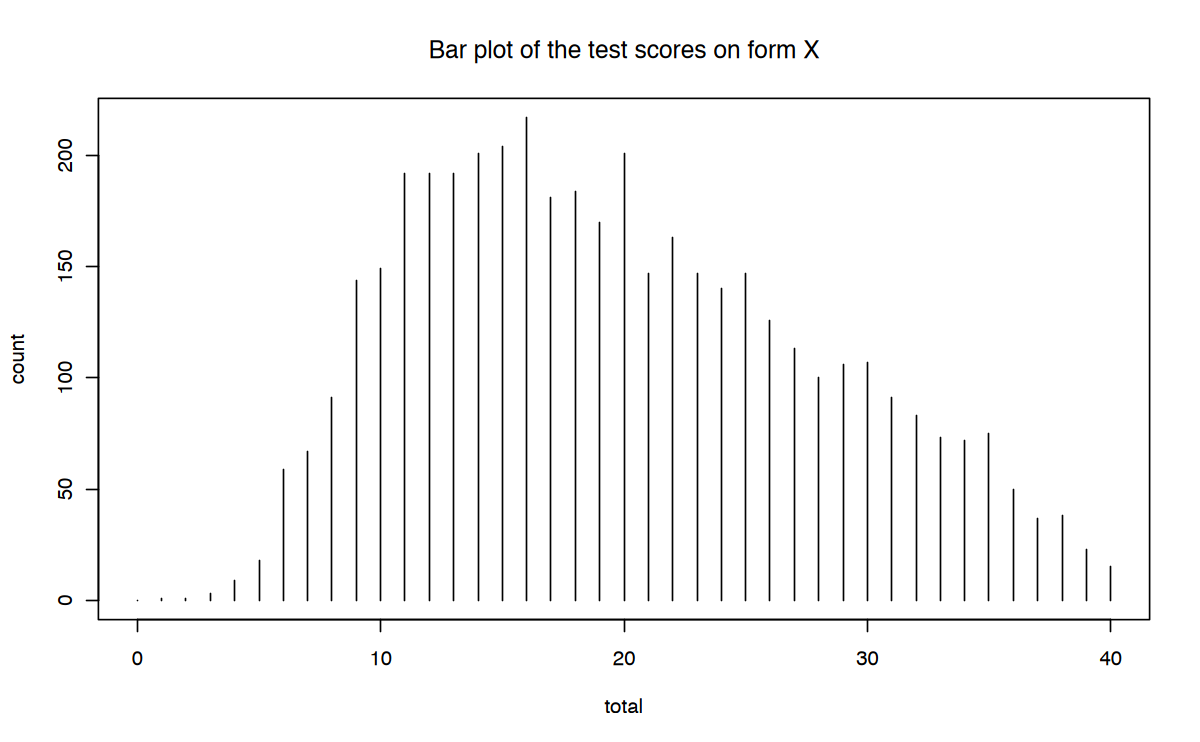

In [21]:
plot(x = form_x, main = "Bar plot of the test scores on form X")

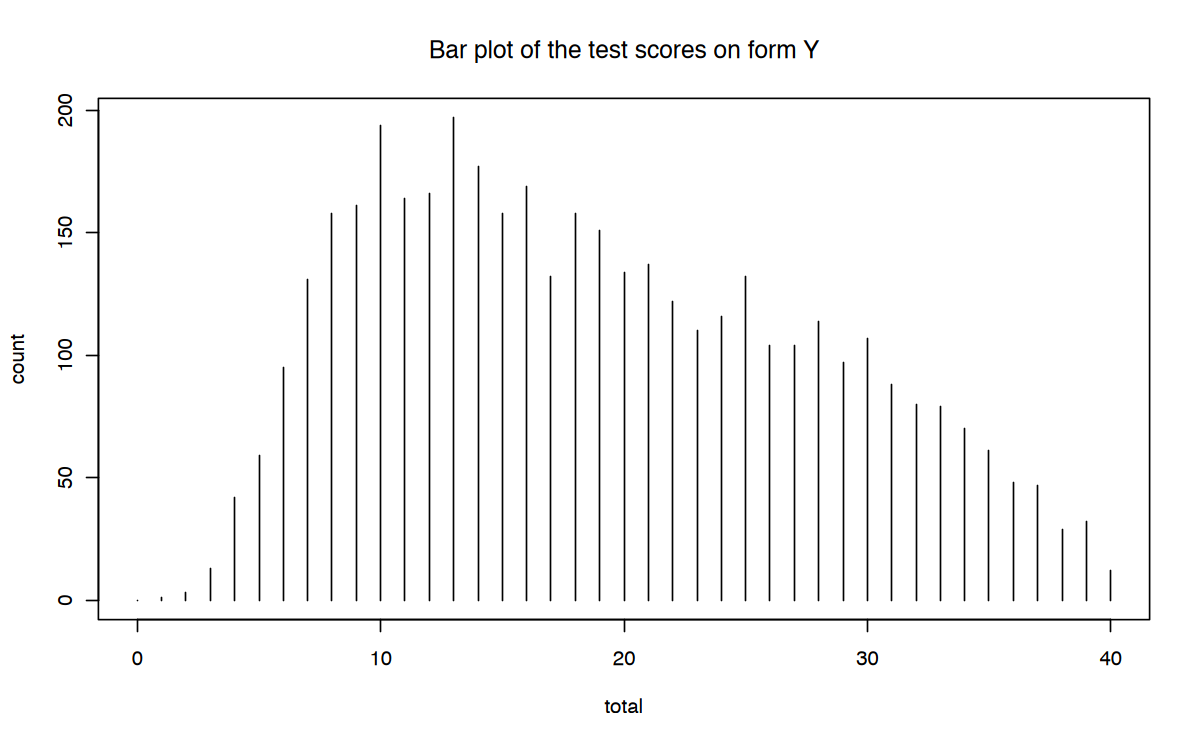

In [22]:
plot(x = form_y, main = "Bar plot of the test scores on form Y")

## Metodi di Equating Lineare

I metodi di equating lineare comprendono diverse funzioni: identità (ossia, nessun equating), media, lineare semplice e nonlineare.

### Equating Basato sulla Media

Questo metodo corregge i punteggi della nuova forma (X) utilizzando la differenza tra le medie delle due forme (X e Y) come costante fissa. In altre parole, il punteggio sulla scala di X viene traslato di un valore pari alla differenza delle medie, per compensare eventuali discrepanze di difficoltà tra le due forme.

Trasformiamo i punteggi X con il metodo di equating basato sulla media usando la funzione `equate()`.

In [23]:
mean_yx <- equate(form_x, form_y, type = "mean")
mean_yx


Mean Equating: form_x to form_y 

Design: equivalent groups 

Summary Statistics:
   mean   sd skew kurt  min  max    n
x  19.9 8.21 0.38 2.30 1.00 40.0 4329
y  19.0 8.94 0.35 2.15 1.00 40.0 4152
yx 19.0 8.21 0.38 2.30 0.13 39.1 4329

Coefficients:
intercept     slope        cx        cy        sx        sy 
   -0.873     1.000    20.000    20.000    40.000    40.000 


Possiamo anche consultare la tabella di concordanza per verificare come i punteggi della forma $X$ siano cambiati dopo essere stati equiparati alla forma $Y$. La tabella di concordanza indica che un esaminando che ha ottenuto un punteggio di 1 sulla forma $X$ si aspetterebbe di ottenere un punteggio di 1-0.873 sulla forma $Y$. In pratica, si tratta di una semplice trasformazione: il punteggio della forma $X$ viene incrementato di -0.873.

In [15]:
head(mean_yx$concordance)

,scale,yx
,<dbl>,<dbl>
1,0,-0.873
2,1,0.127
3,2,1.127
4,3,2.127
5,4,3.127
6,5,4.127


Possiamo unire la tabella di concordanza alla forma $X$ in modo da visualizzare insieme sia i punteggi originali che quelli equiparati per ogni esaminando.

In [41]:
# Save the concordance table
form_yx <- mean_yx$concordance

# Rename the first column to total
colnames(form_yx)[1] <- "total"

# Merge the concordance table to form x
data_xy <- merge(form_x, form_yx)
head(data_xy)

,total,count,yx
,<dbl>,<dbl>,<dbl>
1,0,0,-0.873
2,1,1,0.127
3,2,1,1.127
4,3,3,2.127
5,4,9,3.127
6,5,18,4.127


Sia `form_x` che `form_xy` sono tabelle di contingenza.

In [45]:
form_yx |> head()

,total,yx
,<dbl>,<dbl>
1,0,-0.873
2,1,0.127
3,2,1.127
4,3,2.127
5,4,3.127
6,5,4.127


In [46]:
form_x |> head()

,total,count
,<dbl>,<dbl>
1,0,0
2,1,1
3,2,1
4,3,3
5,4,9
6,5,18


Per ottenere i dati grezzi, prima le trasformiamo in un oggetto `data.frame`.

In [59]:
form_x_df <- form_x |> as.data.frame()
form_yx_df <- form_yx |> as.data.frame()

Poi ricostruiamo i dati grezzi.

In [60]:
# Ricostruire i dati grezzi per form_x
raw_data_x <- rep(form_x_df$total, form_x_df$count)

# Ricostruire i dati grezzi per form_yx (usando i punteggi trasformati yx)
raw_data_yx <- rep(form_yx_df$yx, form_x_df$count) # Assumendo che i conteggi siano identici

I dati trasformati X sono semplicemente una tralazione lineare dei dati originari.

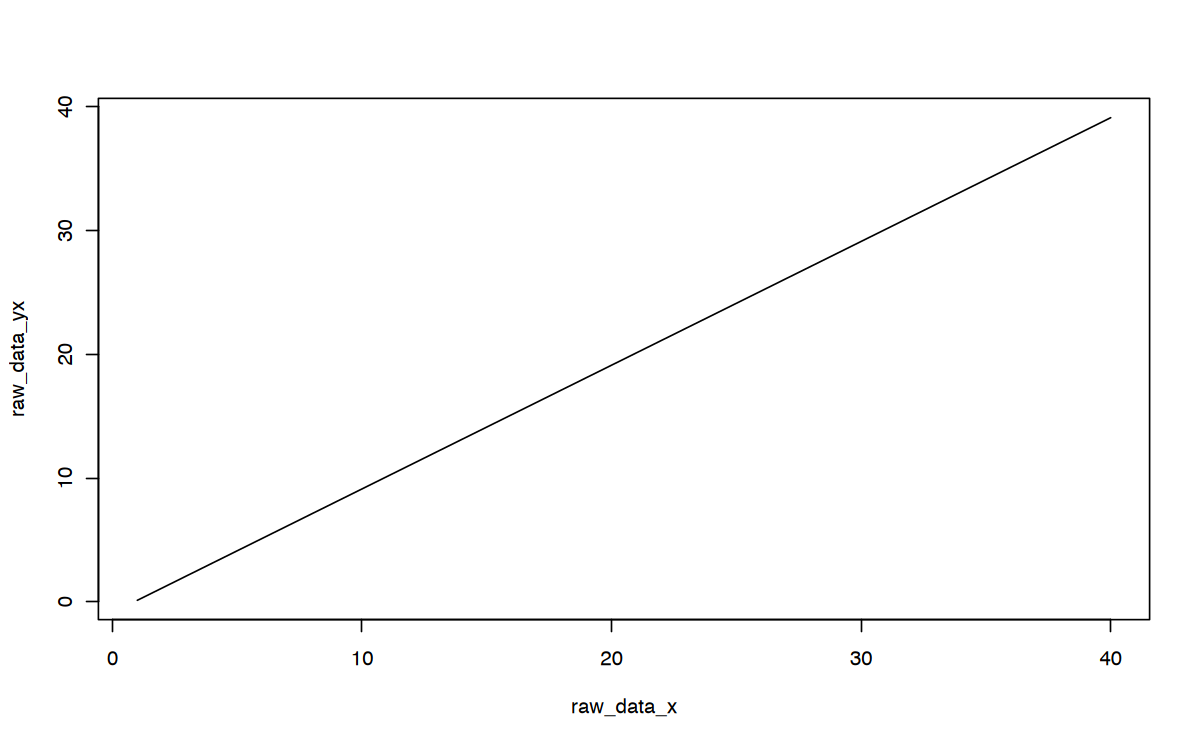

In [61]:
plot(raw_data_x, raw_data_yx, type = 'l')

### Equating Lineare

Questo metodo corregge i punteggi della nuova forma ($X$) utilizzando sia la differenza delle medie che quella delle deviazioni standard tra le due forme ($X$ e $Y$), applicando un'equazione lineare.

In [62]:
linear_yx <- equate(form_x, form_y, type = "linear")
linear_yx


Linear Equating: form_x to form_y 

Design: equivalent groups 

Summary Statistics:
   mean   sd skew kurt   min  max    n
x  19.9 8.21 0.38 2.30  1.00 40.0 4329
y  19.0 8.94 0.35 2.15  1.00 40.0 4152
yx 19.0 8.94 0.38 2.30 -1.54 40.9 4329

Coefficients:
intercept     slope        cx        cy        sx        sy 
    -2.63      1.09     20.00     20.00     40.00     40.00 


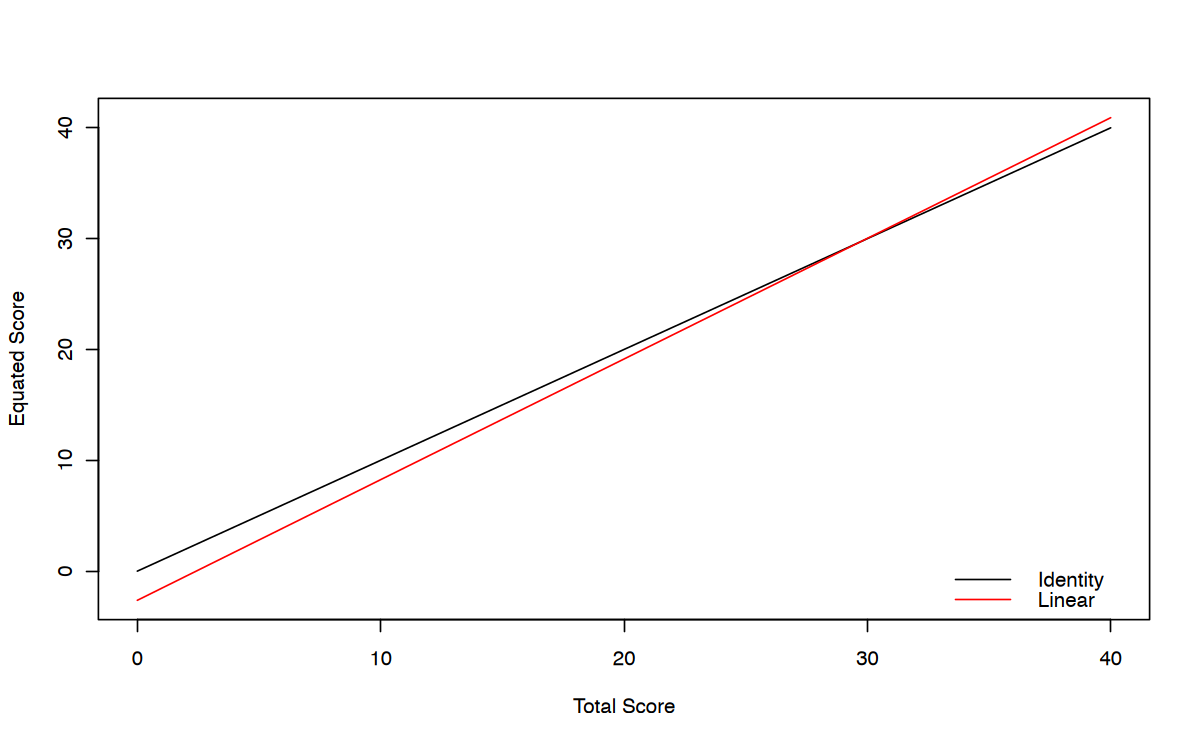

In [51]:
plot(linear_yx)

Possiamo anche eseguire un bootstrap per il processo di equating e creare un grafico degli errori standard:

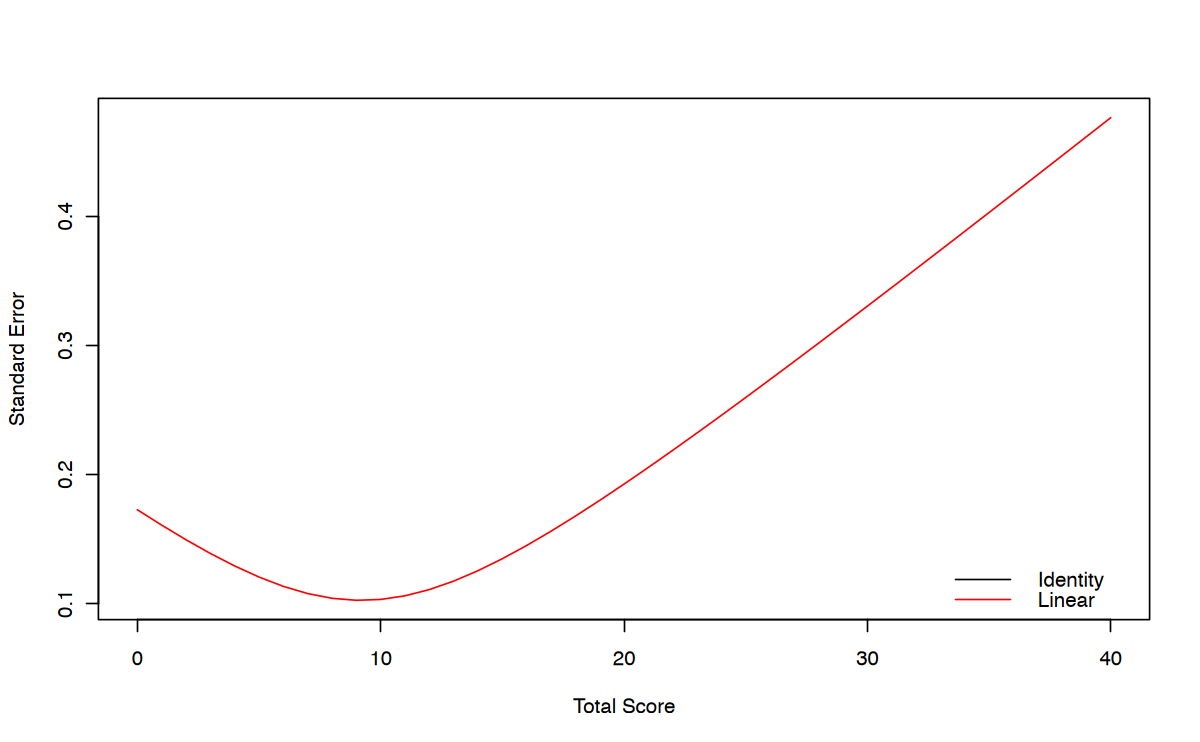

In [53]:
linear_yx_boot <- equate(form_x, form_y, type = "linear", boot = TRUE, reps = 5)
plot(linear_yx_boot, out = "se")

### Equating Non Lineare

I metodi di equating non lineare includono l'equipercentile, l'arco circolare e le funzioni composte.

#### Equating Equipercentile

L'equipercentile funziona suddividendo i punteggi delle forme $X$ e $Y$ in percentili. Successivamente, i percentili della forma $X$ vengono abbinati ai percentili della forma $Y$.

Ad esempio, possiamo applicare l'equipercentile con il seguente comando:

In [54]:
equi_yx <- equate(form_x, form_y, type = "equipercentile")

Ora possiamo verificare come i punteggi di $X$ siano stati corretti in base ai ranghi percentili delle forme $X$ e $Y$. Il grafico seguente mostra che le maggiori discrepanze tra queste due funzioni si trovano alle estremità della distribuzione:

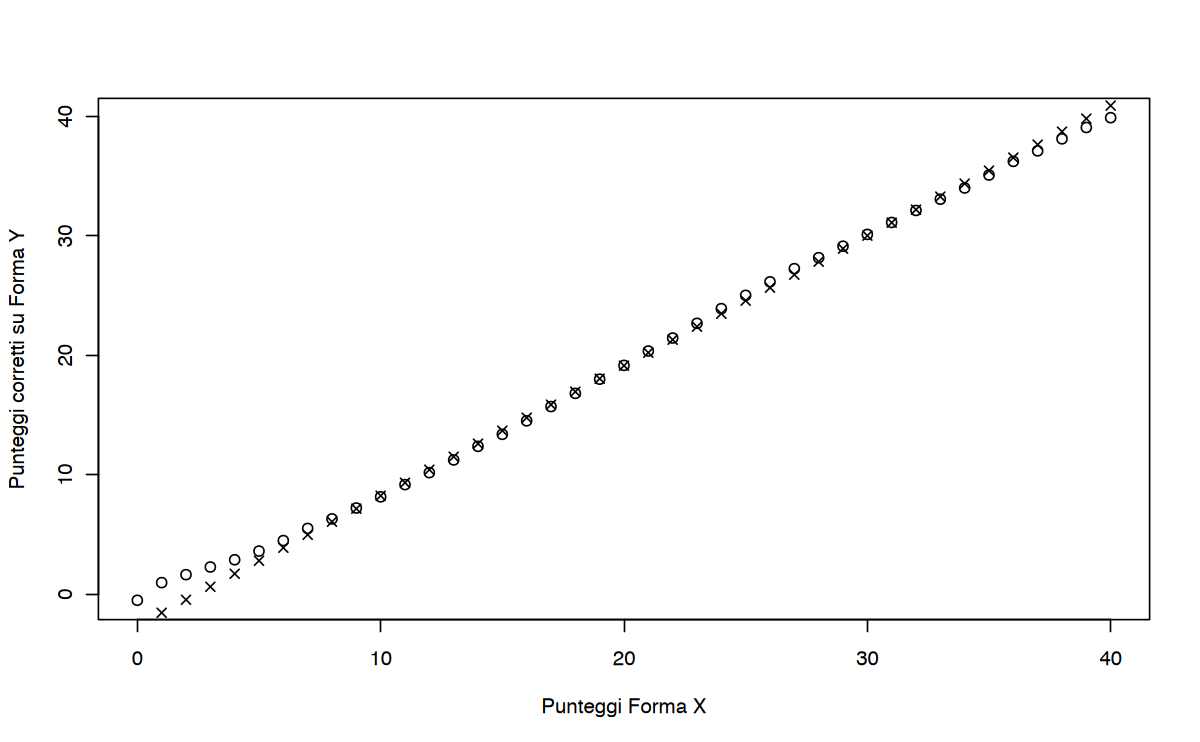

In [57]:
plot(equi_yx$concordance$yx ~ equi_yx$concordance$scale,
    type = "p",
    xlab = "Punteggi Forma X",
    ylab = "Punteggi corretti su Forma Y"
)
points(linear_yx$concordance$yx ~ linear_yx$concordance$scale, pch = 4)

#### Smoothing Loglineare

Possiamo anche aggiungere uno smoothing loglineare al processo e confrontarlo con il metodo equipercentile standard. La linea curva indica l'equipercentile con smussamento loglineare, mentre la linea dritta (con un punto di rottura) rappresenta l'equipercentile standard. 

Questo confronto consente di osservare come il processo di smussamento renda la relazione tra le due forme più fluida e meno sensibile alle variazioni estreme.

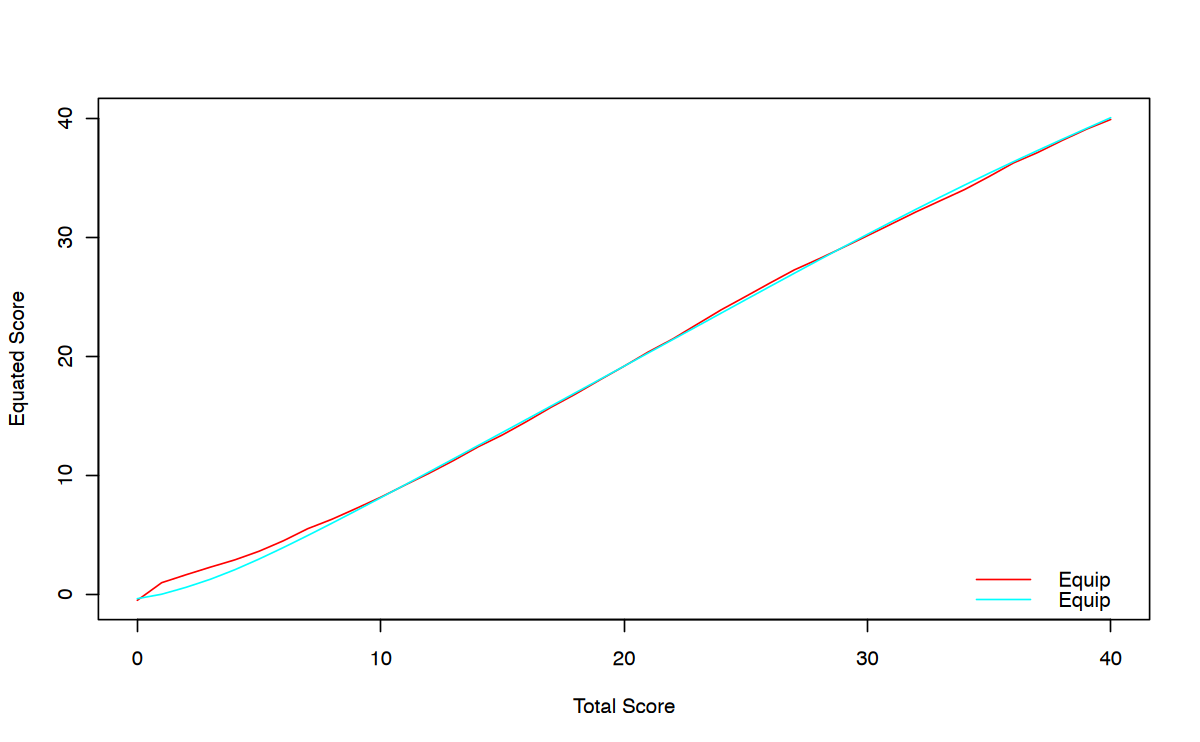

In [58]:
equismooth_yx <- equate(form_x, form_y, type = "equipercentile", smooth = "loglin", degree = 3)

# Compare equating functions
plot(equi_yx, equismooth_yx, addident = FALSE)

In questo caso, lo smoothing non ha praticamente effetto.

## Gruppi Non Equivalenti

In un disegno a gruppi non equivalenti, non si può assumere che la popolazione di esaminandi che sostiene le diverse forme del test provenga dalla stessa popolazione. Pertanto, è necessario tenere conto delle potenziali differenze nelle loro abilità relative al costrutto misurato. Quando si utilizza un disegno a gruppi non equivalenti, è indispensabile specificare un metodo di equating adeguato. 

Generalmente, questi metodi stabiliscono una relazione tra i punteggi totali della forma $X$ e della forma $Y$ attraverso i punteggi ottenuti su un insieme comune di item presenti in entrambe le forme (noti come **anchor items**) e la creazione di una popolazione sintetica ponderata. Per maggiori informazioni su questi metodi, si rimanda ad Albano (2016).

I metodi di equating disponibili nel pacchetto **equate** per i gruppi non equivalenti includono:

- **Tucker**
- **Nominal**
- **Levine true score**
- **Braun/Holland**
- **Frequency**
- **Chained**

Per un approfondimento, si rimanda al manuale del pacchetto **equate**.

## Equating Basato sulla Teoria della Risposta all’Item

L’equating basato sulla **Item Response Theory (IRT)** rappresenta un approccio avanzato per confrontare e rendere comparabili punteggi di diverse forme di un test. Questo metodo sfrutta la capacità della IRT di modellare la relazione tra le risposte degli esaminandi e le caratteristiche degli item. I metodi IRT di equating si dividono in due categorie principali:

1. **Equating attraverso item comuni**
2. **Equating attraverso persone comuni**

In entrambi i casi, gli **item comuni** o le **persone comuni** fungono da ponte tra le due forme del test, consentendo di stabilire una scala comune per il confronto dei punteggi.

### Equating Attraverso Item Comuni

L’equating basato su item comuni utilizza item identici inclusi in entrambe le forme del test. Questi item condivisi, detti **item ancorati** (*anchor items*), permettono di calibrare le due forme su una scala comune. Le applicazioni tipiche includono:

1. **Equating tramite costanti di equating**  
   In questo approccio, si utilizzano costanti per collegare i parametri degli item delle due forme. Queste costanti sono derivate dagli item comuni, che aiutano a compensare le differenze tra le due forme del test.

2. **Equating tramite curve caratteristiche del test**  
   Le **curve caratteristiche del test (TCC, Test Characteristic Curves)** rappresentano la relazione tra i punteggi latenti ($\theta$) e i punteggi osservati. Con questo metodo, si utilizzano le TCC delle due forme per stabilire una corrispondenza tra i punteggi.

3. **Equating tramite calibrazione simultanea**  
   La calibrazione simultanea prevede di stimare i parametri degli item di entrambe le forme del test in un'unica analisi. Gli item comuni agiscono come vincoli per collegare le due forme sulla stessa scala.

### Vantaggi dell'Equating IRT

- Consente di correggere le differenze tra le forme del test basandosi su parametri specifici degli item (difficoltà, discriminazione, probabilità di indovinare).
- Non richiede che le distribuzioni delle abilità degli esaminandi siano identiche per le due forme, rendendolo particolarmente utile per disegni a gruppi non equivalenti.
- Può gestire forme di test con numero di item diverso o contenuti solo parzialmente sovrapposti.

L’utilizzo dell’IRT garantisce una maggiore precisione rispetto ai metodi tradizionali, soprattutto in presenza di forme di test complesse. Le funzionalità necessarie per implementare questi metodi sono disponibili nel pacchetto R **equateIRT**, che offre strumenti avanzati per l’equating basato sulla teoria della risposta all’item. Per ulteriori approfondimenti, si consiglia di consultare la documentazione del pacchetto.

## Riflessioni Conclusive

In questo capitolo abbiamo esplorato i metodi di equating basati sulla **Classical Test Theory (CTT)** e abbiamo fornito alcuni accenni sui metodi basati sulla **Item Response Theory (IRT)**. Abbiamo analizzato come l'equating consenta di confrontare i punteggi di diverse forme di un test, garantendo equità e comparabilità anche in presenza di differenze di difficoltà tra le forme. In conclusione, la capacità di confrontare e convertire punteggi tra diverse forme di test non è solo un esercizio statistico, ma un elemento fondamentale per assicurare l'equità e la validità dei processi valutativi.

## Session Info

In [63]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.1.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] equate_2.0.8      aspect_1.0-6      missForest_1.5    nortest_1.0-4    
 [5] MASS_7.3-61       viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0     
 [9] ggExtra_0.10.1    gridExtra_2.3     patchwork_1.3.0   bayesplot_1.11.1 
[13] semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-19     psych_2.4.6.26   
[17] scales_1.3.0      markdown_1.13     knitr_1.49        lubridate_1.9.3  
[21] forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4       purrr_1.0.2      
[25] readr_2.1.5     